1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

2. Load Dataset

In [4]:
# Load CSV file
df = pd.read_csv("BankNote_Authentication.csv")

print("Dataset shape:", df.shape)
df.head()


Dataset shape: (1372, 5)


,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


3. Exploratory Data Analysis (EDA) 

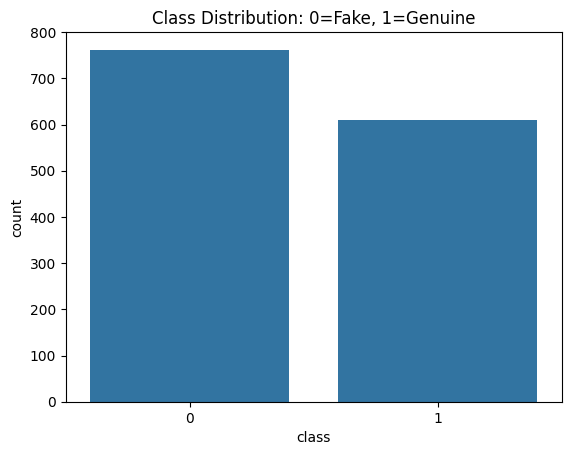

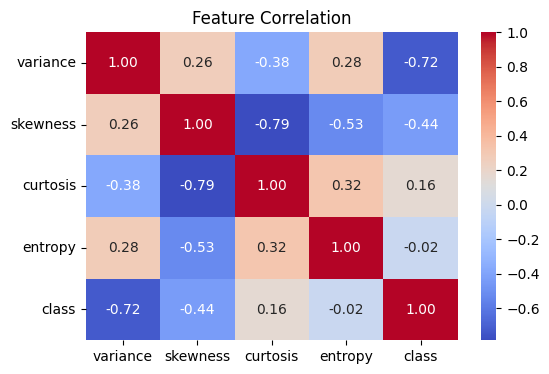

In [5]:
# Check class balance
sns.countplot(x=df['class'])
plt.title("Class Distribution: 0=Fake, 1=Genuine")
plt.show()

# Correlation heatmap
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation")
plt.show()


4. Data Preprocessing

In [7]:
X = df.drop("class", axis=1).values
y = df["class"].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


5. Build ANN Model

In [6]:
model = Sequential([
    Dense(16,activation='relu', input_shape=(4,)),
    Dense(8,activation='relu'),
    Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225 (900.00 B)

 Trainable params: 225 (900.00 B)

 Non-trainable params: 0 (0.00 B)

6. Train Model

In [8]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.6499 - loss: 0.6579 - val_accuracy: 0.6818 - val_loss: 0.6428
Epoch 2/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7617 - loss: 0.6023 - val_accuracy: 0.7591 - val_loss: 0.5968
Epoch 3/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8495 - loss: 0.5534 - val_accuracy: 0.8136 - val_loss: 0.5486
Epoch 4/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8837 - loss: 0.5000 - val_accuracy: 0.8773 - val_loss: 0.4953
Epoch 5/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9076 - loss: 0.4435 - val_accuracy: 0.9045 - val_loss: 0.4394
Epoch 6/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9259 - loss: 0.3852 - val_accuracy: 0.9136 - val_loss: 0.3834
Epoch 7/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9293 - loss: 0.3279 - val_accuracy: 0.9182 - val_loss: 0.3289
Epoch 8/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9407 - loss: 0.2742 - val_accuracy: 0.9364 - 

7. Training Visualization

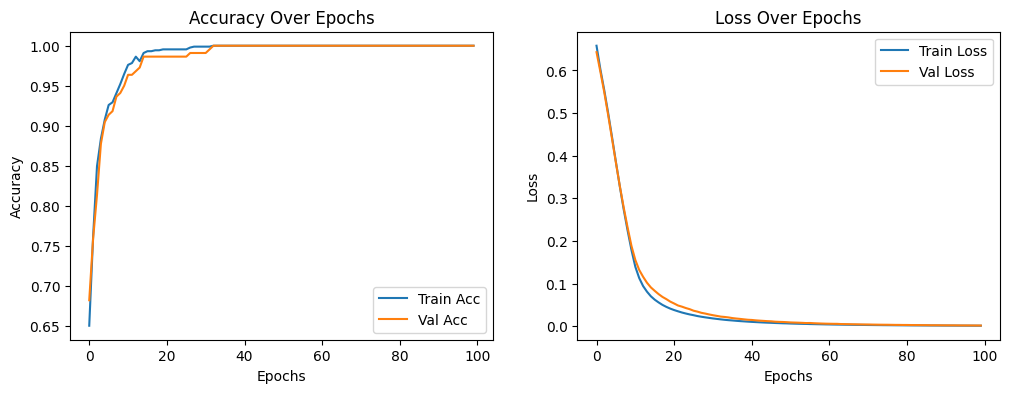

In [9]:
plt.figure(figsize=(12,4))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Accuracy Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()


8. Evaluation

✅ Test Accuracy: 1.0000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


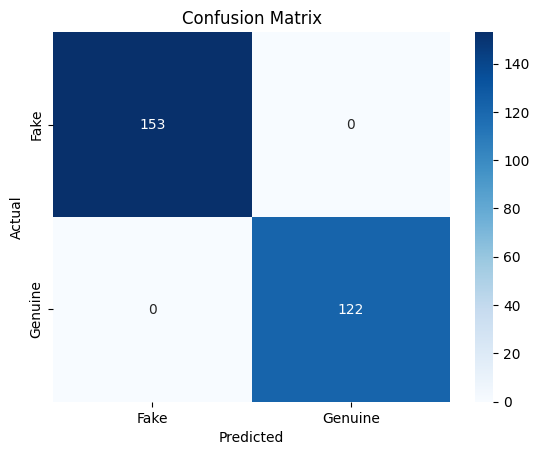

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       153
           1       1.00      1.00      1.00       122

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



In [10]:
# Evaluate on test set
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"✅ Test Accuracy: {acc:.4f}")

# Predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Fake","Genuine"], yticklabels=["Fake","Genuine"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification report
print(classification_report(y_test, y_pred))


9. Insights

### Insights
- Binary classification with **sigmoid** works perfectly here.
- ANN achieves >99% accuracy because features are well-separated.
- ROC curve and AUC score can further verify the classifier’s performance.


10. Save Model

In [11]:
model.save("banknote_authenticator.h5")
print("Model saved successfully!")


Model saved successfully!


## prediction cell

In [17]:
# Example: Predicting from manual input

import numpy as np

# Example input: [variance, skewness, curtosis, entropy]

#---------------------------------------------------------------
# Replace with your own values
sample_input = np.array([[1.6408, 4.2503, -4.9023, -2.6621]])

#Example for Fake note
#sample_input = np.array([[3.6216, 8.6661, -2.8073, -0.44699]])
#---------------------------------------------------------------

# Scale input the same way as training data

#Example for Genuine note
sample_input_scaled = scaler.transform(sample_input)

# Predict
prediction = model.predict(sample_input_scaled)

# Convert probability -> class (0 or 1)
predicted_class = (prediction > 0.5).astype("int32")

print(f"Predicted Probability: {prediction[0][0]:.4f}")
print("Prediction:", "Genuine" if predicted_class[0][0] == 1 else "Fake")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
Predicted Probability: 0.9979
Prediction: Genuine
